<a href="https://colab.research.google.com/github/xoghd1126/G4-finalproject/blob/main/Final%20Project(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0. Before Start**
##Students

* Make sure to create a Google account and sign up for Huggingface before class.

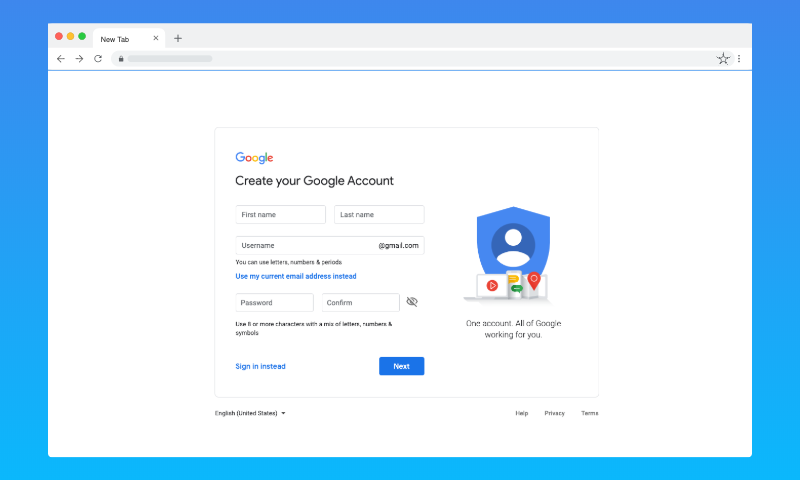

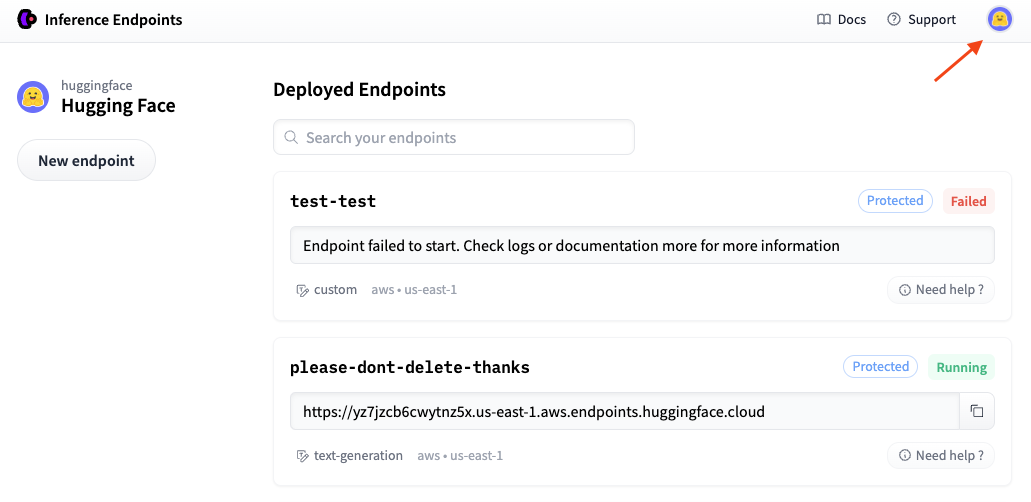

##Teacher

Make sure to install all the necessary packages

* Wordcloud: to generate a wordcloud

* Matplotlib: to generate image files

* Gradio: to implement our code as a web-interface application

* GTTs: text-to-audio

* Pyqrcode: to generate a QR code to share with the user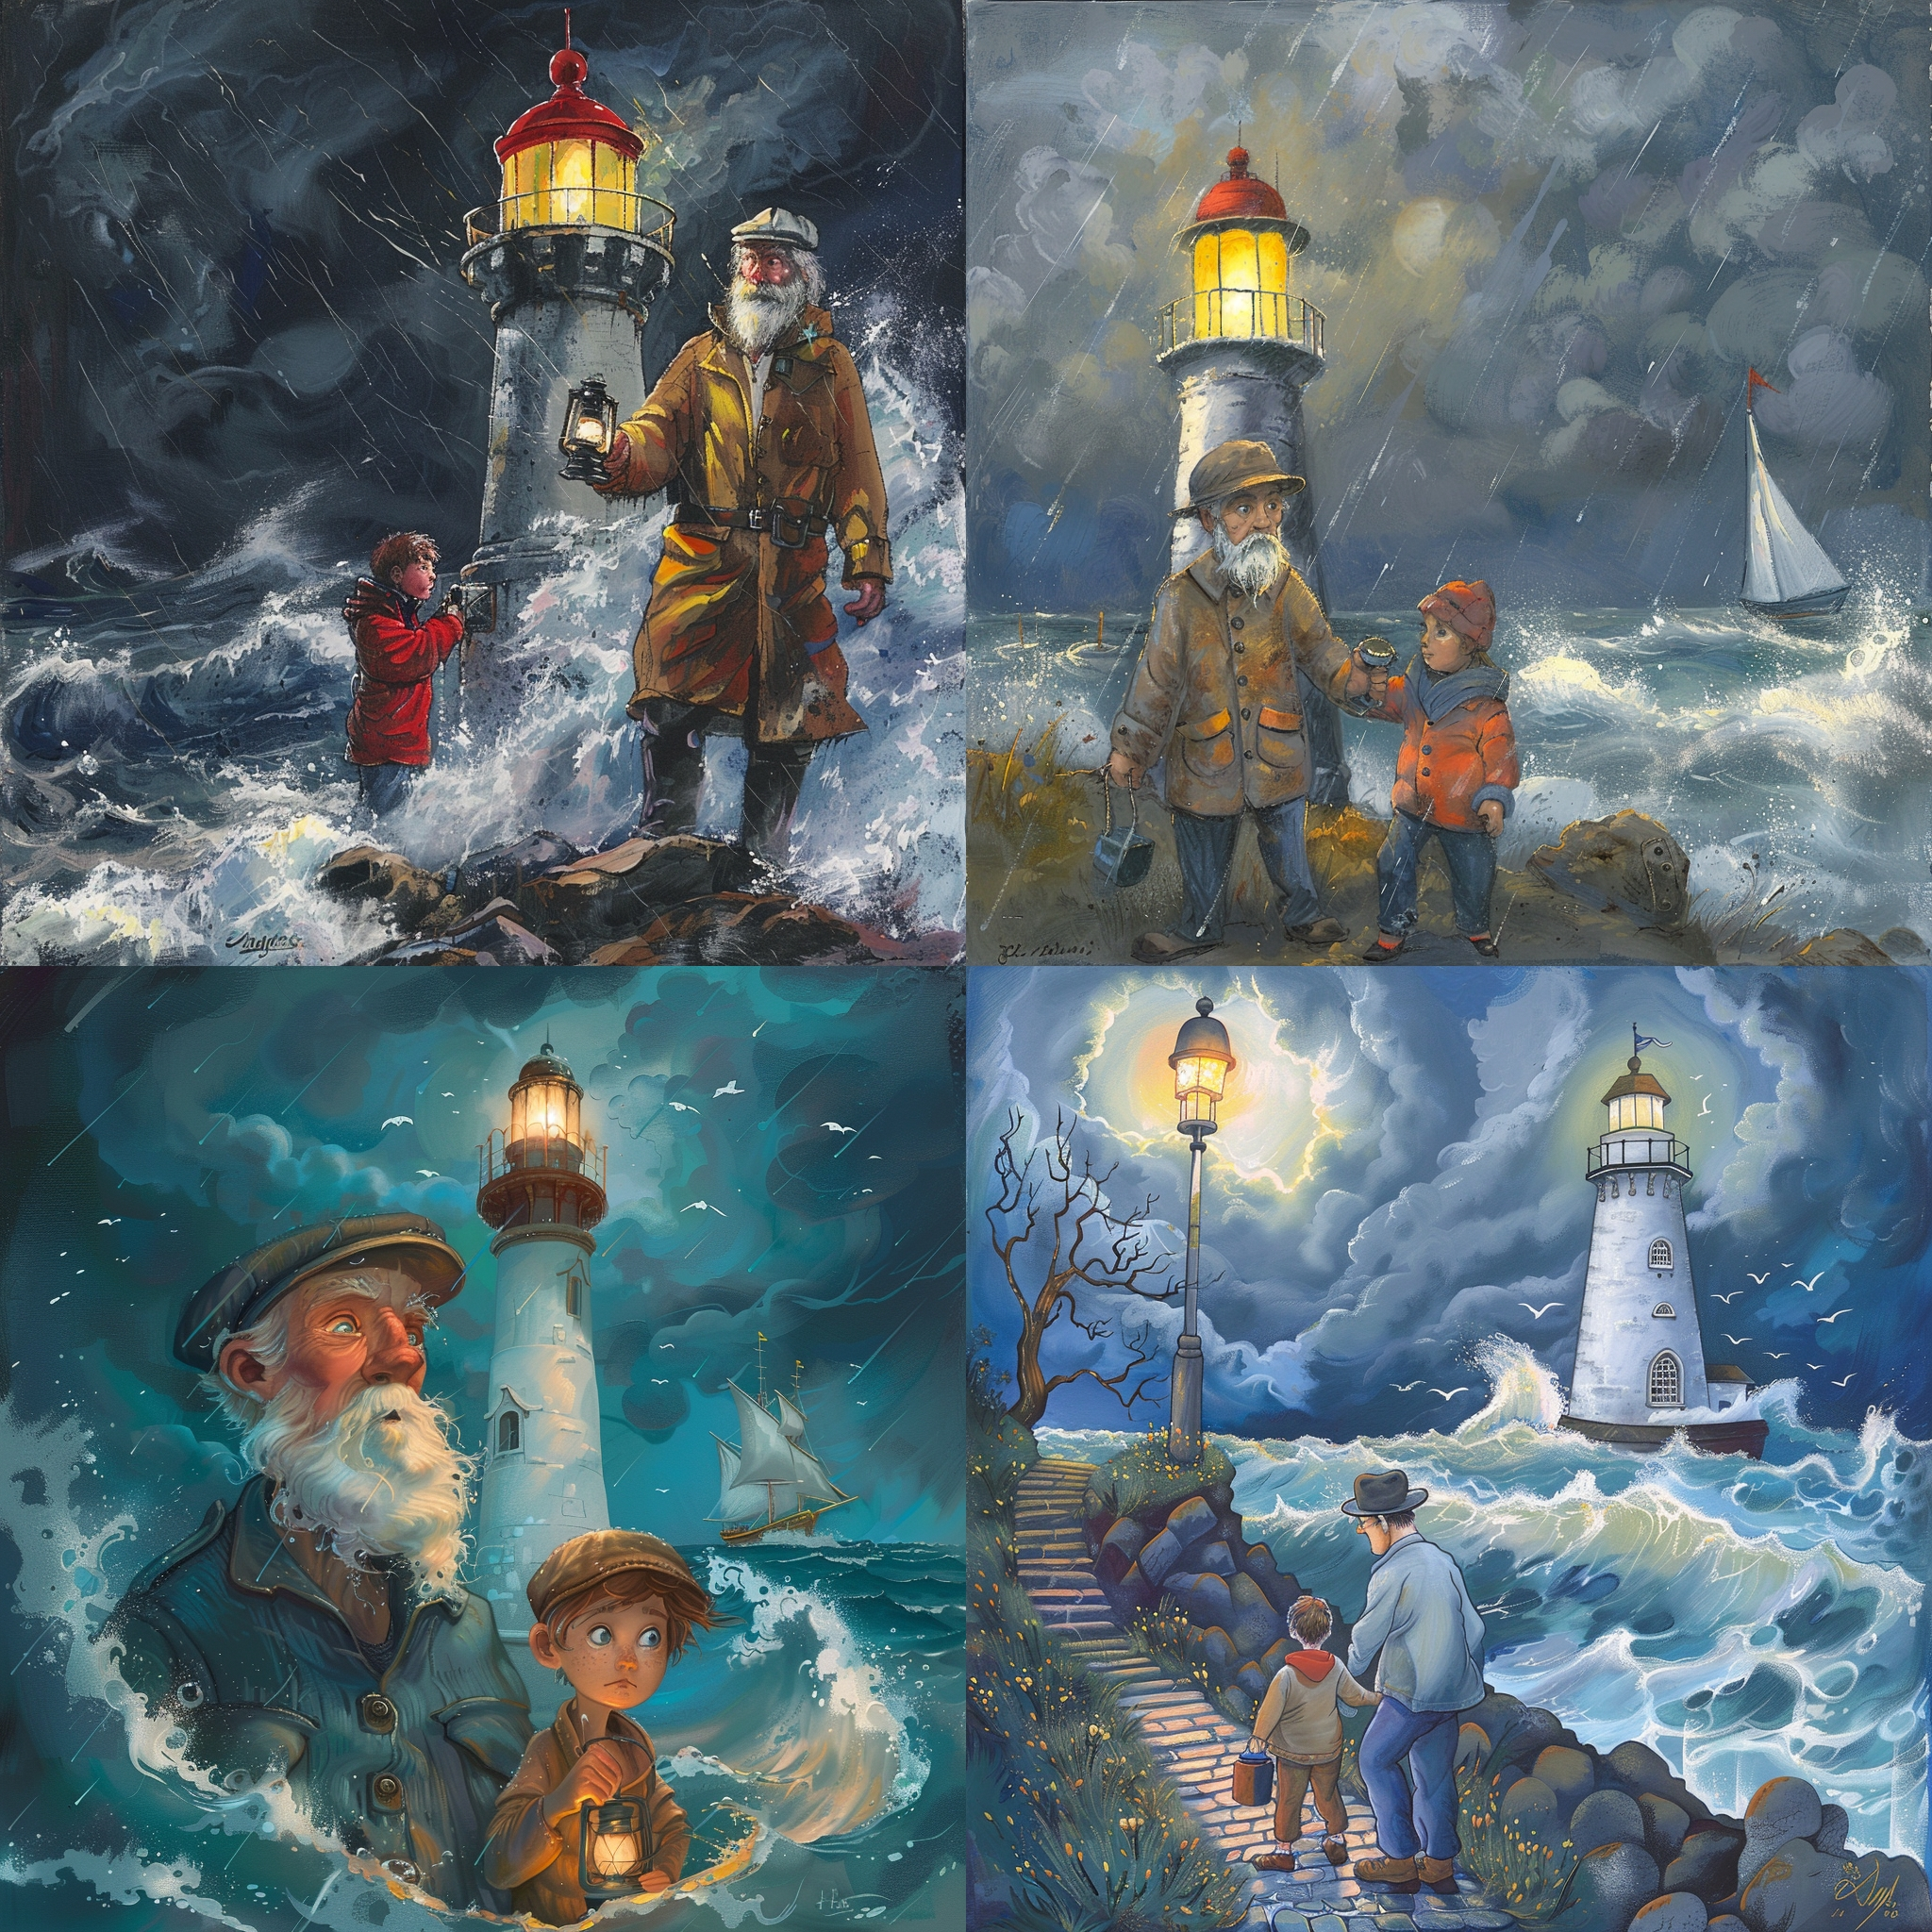

In [13]:
%%capture
!pip install qrcode[pil]

Enter the link: https://colab.research.google.com/github/xoghd1126/G4-finalproject/blob/main/Final%20Project(2).ipynb#scrollTo=EpWOswhGBjC4
QR code generated! Saved as qrcode.png


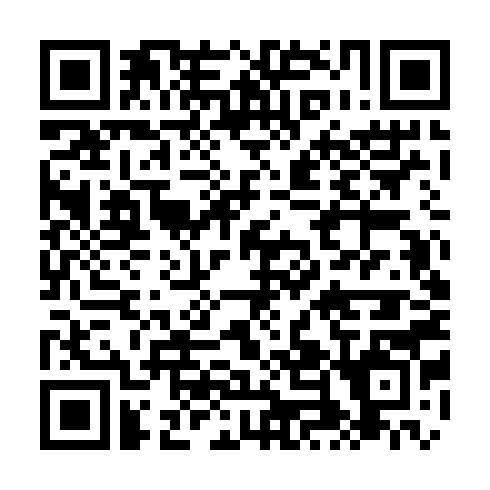

In [14]:
import qrcode
from IPython.display import Image
def generate_qr_code(link, filename="qrcode.png"):
    qr = qrcode.QRCode(version=1, error_correction=qrcode.constants.ERROR_CORRECT_L, box_size=10, border=4)
    qr.add_data(link)
    qr.make(fit=True)
    img = qr.make_image(fill_color="black", back_color="white")
    img.save(filename)
    return filename
link = input("Enter the link: ")
filename = generate_qr_code(link)
print(f"QR code generated! Saved as {filename}")
Image(filename=filename)

# **1. Guess the story (Warming up - Make a storyboard with Huggingface)**
####Using the words in the wordcloud, create a storyline of about four lines. Insert the sentences into the Hugging face text-to-image page, and work in groups to create a short story with an accompanying picture and upload it to the Padlet.

####If you are unsure of the meaning of a word in the wordcloud, check this link : https://e4103bc9f54ea60d32.gradio.live/

####Text-to-Image page link : https://huggingface.co/ZB-Tech/Text-to-Image?text=

####Upload the works in Padlet : https://padlet.com/mirankim316/digital-literacy-and-english-education-spring-2024-2gmo48o5djxsjpqa

In [ ]:
%%capture
!pip install wordcloud matplotlib

Text link: https://raw.githubusercontent.com/MK316/Spring2024/main/DLTESOL/project/story04.txt

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = """
In a small coastal town edged by jagged cliffs and vast, open sea, stood an old lighthouse that had guarded the mariners for generations. The lighthouse keeper, Mr. Elias, was an elderly man who had spent many years ensuring the light never failed, keeping ships safe from the dangerous rocks below. Elias's grandson, Jamie, loved to visit the lighthouse. He was fascinated by the stories his grandfather told of ships from distant lands and the many storms the lighthouse had withstood. However, over the years, fewer ships passed by, and the town council questioned the need to keep the lighthouse operational. They proposed using modern technology, which was cheaper and required less maintenance. One evening, as a fierce storm brewed, the council decided to test their new electronic navigation system, planning to retire the old lighthouse lamp after proving the new system's efficiency. Elias was heartbroken but knew he had to comply. That night, with the storm at its peak and the new system in place, the unthinkable happened—the electronic system failed due to the severe weather conditions. In a panic, the town council realized their error. Without the lighthouse’s beam, ships at sea would be in grave danger. They rushed to Elias, asking for his help. Elias turned to Jamie, handing him a small, old lantern — a backup they had never thought they’d use. "Hurry, take this to the top! It isn’t as bright, but it might just guide them in until we can fix the main light."
Braving the howling wind and pelting rain, Jamie climbed the winding stairs of the lighthouse with the lantern. Reaching the top, he held the lantern high, its light flickering but steady. All he could do was hope it was enough. Miraculously, the small light was seen by a nearby ship. The captain, familiar with the lighthouse’s position, navigated away from the cliffs just in time, guiding the ship safely into the harbor. The town breathed a sigh of relief, and the council members were humbled by their near-disastrous decision. From that day on, the council reinstated the old lighthouse, restoring it and even enhancing its light to ensure higher visibility. Jamie learned the importance of resilience and tradition, and he took great pride in helping his grandfather. Inspired by the event, he started learning more about navigational technology, combining new methods with the reliable old ways. Years later, Jamie became the lighthouse keeper, just like his grandfather. He maintained the tradition of the lighthouse while integrating modern technology responsibly, ensuring that the lighthouse continued to be a beacon of safety and a symbol of the town’s enduring spirit. The story of the lighthouse keeper’s lantern became a cherished tale, reminding everyone that sometimes, the simplest solutions are the most effective in times of need. It taught the town the value of wisdom, experience, and the importance of blending the old with the new to navigate the future safely.
"""

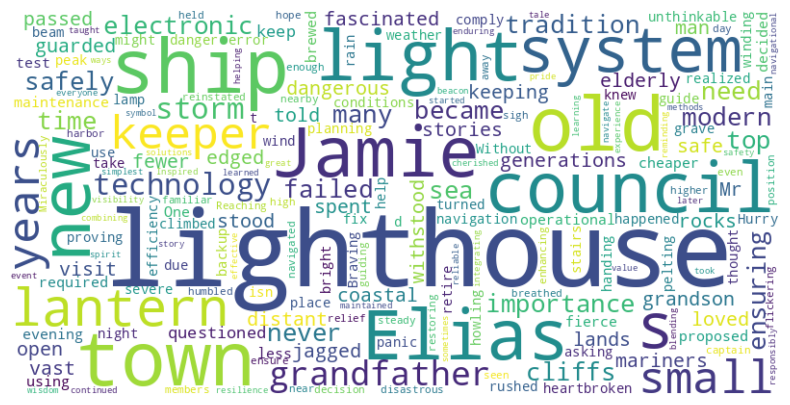

In [ ]:
# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
%%capture
# Install necessary libraries
!pip install gradio gtts

In [ ]:
# Import libraries
import gradio as gr
from gtts import gTTS

# Simple dictionary for demonstration purposes
translation_dict = {
    "passed": "지나가버린",
    "beam": "빛줄기",
    "electronic": "전자의",
    "fascinate": "마음을 사로잡다, 매료하다",
    "comply": "따르다",
    "tradition": "전통",
    "guard": "지키다, 보호하다, 경비를 보다",
    "peak": "절정, 정점, 최고조, 꼭대기",
    "maintenance": "유지, 생활비, 지속",
    "harbor": "항구, 항만",
    "condition": "상태, 조건",
    "storm": "폭풍, 태풍",
    "edged": "날이 있는, 가장자리가 있는",
    "decide": "결정하다",
    "elderly": "연세가 드신, 나이가 든",
    "realize": "깨닫다, 알아차리다, 인식하다",
    "modern": "현대적인",
    "grave": "무덤, 묘",
    "generation": "세대",
    "cheaper": "더 싼, 더 저렴한",
    "technology": "기술",
    "fail": "실패하다",
    "proving": "검증하다, 입증하다",
    "require": "요구하다, 필요하다, 요청하다",
    "climb": "오르다, 등반하다",
    "stood": "stand의 과거 분사, 서다, 일어서다",
    "council": "의회",
    "position": "위치, 자리, 배치하다",
    "navigation": "항해, 운항",
    "operation": "작동, 가동, 조작",
    "happen": "(사건 등이) 일어나다",
    "lighthouse": "등대",
    "lantern": "손전등, 랜턴",
    "vast": "어마어마한, 방대한, 막대한",
    "relief": "안도, 안도감",
    "importance": "중요성",
    "grandson": "손자, 외손자",
    "fierce": "사나운, 격렬한, 극심한",
    "panic": "극심한 공포, 겁에 질려 어쩔 줄 모르다",
    "proposed": "제안된",
    "mariner": "선원, 뱃사람",
    "ensure": "반드시 ~하게 하다, 보장하다",
    "responsibly": "책임감 있게",
    "flickering": "깜박거리는, 꺼질 것 같은, 약한",
    "cliff": "절벽",
    "humble": "겸손한, 겸허하게 만들다",
    "severe": "극심한, 가혹한, 엄한",
    "efficiency": "효율, 효율화",
    "familiar": "익숙한",
    "guiding": "인도하는, 안내하는",
    "jagged": "삐쭉삐쭉한, 들쑥날쑥한",
    "decision": "결정, 결단력",
    "disastrous": "처참한, 형편없는",
    "heartbroken": "비통해 하는, 슬픔에 잠긴, 비탄에 젖은",
    "wisdom": "지혜",
    "solution": "해결책",
    "miraculously": "기적적으로",
    "rush": "급히 움직이다, 혼잡, 치밀어 오르다",
    "brewed": "몰아치다",
    "reinstated": "복직하다, 복귀하다",
    "enduring": "오래가는",
    "winding": "구불구불한",
    "unthinkable": "상상도 할 수 없는"
}

# Define the translation and text-to-speech function
def translate_and_speak(word):
    korean_translation = translation_dict.get(word.lower(), "Translation not found")
    tts = gTTS(korean_translation, lang='ko')
    tts.save("translation.mp3")
    return korean_translation, "translation.mp3"

# Create the Gradio interface
interface = gr.Interface(
    fn=translate_and_speak,
    inputs=gr.Textbox(lines=1, placeholder="Enter English word here..."),
    outputs=[gr.Textbox(label="Korean Translation"), gr.Audio(label="Pronunciation")],
    title="English to Korean Translator",
    description="Enter an English word to get its meaning in Korean and listen to the pronunciation."
)

# Launch the interface
interface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://42be3807eeca045ba9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# **2. Checking out the Story (Main Activity - About the story and grammar)**

###2-1. Checking out the story

In [15]:
%%capture
!pip install gradio gtts

In [16]:
# Import necessary libraries
import gradio as gr
from gtts import gTTS

# Define the text-to-speech function
def text_to_speech(text):
    tts = gTTS(text)
    tts.save("output.mp3")
    return "output.mp3"

# Predefined sentences
sentences = [
    "In a small coastal town edged by jagged cliffs and vast, open sea, stood an old lighthouse that had guarded the mariners for generations.",
    "The lighthouse keeper, Mr. Elias, was an elderly man who had spent many years ensuring the light never failed, keeping ships safe from the dangerous rocks below.",
    "Elias's grandson, Jamie, loved to visit the lighthouse.",
    "He was fascinated by the stories his grandfather told of ships from distant lands and the many storms the lighthouse had withstood.",
    "However, over the years, fewer ships passed by, and the town council questioned the need to keep the lighthouse operational.",
    "They proposed using modern technology, which was cheaper and required less maintenance.",
    "One evening, as a fierce storm brewed, the council decided to test their new electronic navigation system, planning to retire the old lighthouse lamp after proving the new system's efficiency.",
    "Elias was heartbroken but knew he had to comply.",
    "That night, with the storm at its peak and the new system in place, the unthinkable happened—the electronic system failed due to the severe weather conditions."
    "In a panic, the town council realized their error. Without the lighthouse’s beam, ships at sea would be in grave danger.",
    "They rushed to Elias, asking for his help. Elias turned to Jamie, handing him a small, old lantern — a backup they had never thought they’d use.",
    "Hurry, take this to the top! It isn’t as bright, but it might just guide them in until we can fix the main light.",
    "Braving the howling wind and pelting rain, Jamie climbed the winding stairs of the lighthouse with the lantern.",
    "Reaching the top, he held the lantern high, its light flickering but steady. All he could do was hope it was enough.",
    "Miraculously, the small light was seen by a nearby ship. The captain, familiar with the lighthouse’s position, navigated away from the cliffs just in time, guiding the ship safely into the harbor.",
    "The town breathed a sigh of relief, and the council members were humbled by their near-disastrous decision.",
    "From that day on, the council reinstated the old lighthouse, restoring it and even enhancing its light to ensure higher visibility.",
    "Jamie learned the importance of resilience and tradition, and he took great pride in helping his grandfather.",
    "Inspired by the event, he started learning more about navigational technology, combining new methods with the reliable old ways.",
    "Years later, Jamie became the lighthouse keeper, just like his grandfather.",
    "He maintained the tradition of the lighthouse while integrating modern technology responsibly, ensuring that the lighthouse continued to be a beacon of safety and a symbol of the town’s enduring spirit.",
    "The story of the lighthouse keeper’s lantern became a cherished tale, reminding everyone that sometimes, the simplest solutions are the most effective in times of need.",
    "It taught the town the value of wisdom, experience, and the importance of blending the old with the new to navigate the future safely."
    ]

# Create the Gradio interface
interface = gr.Interface(
    fn=text_to_speech,
    inputs=gr.Dropdown(choices=sentences, label="Select a sentence"),
    outputs=gr.Audio(type="filepath"),
    title="Text-to-Speech App",
    description="Select a sentence and hear it read aloud using Google Text-to-Speech."
)

# Launch the interface
interface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://7cab08df2deecb0962.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


###2-3. Checking out the grammar (quiz made with gradio, cloze questions)
####Students are able to access to the quiz by QR-code.

In [ ]:
%%capture
!pip install gradio

In [ ]:
import gradio as gr

story = "https://raw.githubusercontent.com/MK316/Spring2024/main/Sample/storysample.txt"

cloze_questions = [
    {"question": "In a small coastal town edged by jagged cliffs and vast, open sea, stood an old lighthouse that had ______ (guard) the mariners for generations.", "answer": "guarded"},
    {"question": "However, over the years, fewer ships ______ (pass) by, and the town council questioned the need to keep the lighthouse operational.", "answer": "passed"},
    {"question": "In a panic, the town council ______ (realize) their error.", "answer": "realized"},
    {"question": "Braving the howling wind and pelting rain, Jamie ______ (climb) the winding stairs of the lighthouse with the lantern.", "answer": "climbed"},
    {"question": "All he ______ (can) do was hope it was enough.", "answer": "could"},
    {"question": "Miraculously, the small light was ______ (see) by a nearby ship. ", "answer": "seen"},
    {"question": "From that day on, the council ______ (reinstate) the old lighthouse, restoring it and even enhancing its light to ensure higher visibility. ", "answer": "reinstated"},
    {"question": "He maintained the tradition of the lighthouse while integrating modern technology responsibly, ensuring that the lighthouse ______ (continue) to be a beacon of safety and a symbol of the town’s enduring spirit.", "answer": "continued"},
    {"question": "One evening, as a fierce storm ______ (brew), the council decided to test their new electronic navigation system", "answer": "brewed"},
    {"question": "Hurry, take this to the top! It isn’t as bright, but it might just guide them in until we can ______ (fix) the main light.”", "answer": "fix"},
]

def cloze_quiz(name, *answers):
    score = 0
    results = []
    for i, question in enumerate(cloze_questions):
        if answers[i].strip().lower() == question["answer"].lower():
            score += 1
            results.append(f"Question {i+1}: Correct\n")
        else:
            results.append(f"Question {i+1}: Incorrect, the correct answer is: {question['answer']}\n")
    result_text = f"* Name: {name}\n* Score: {score} out of {len(cloze_questions)}\n" + "\n".join(results)

    return result_text

inputs = [gr.Textbox(label="Enter your name")] + [gr.Textbox(label=q["question"]) for q in cloze_questions]
outputs = [gr.Textbox(label="Results")]

iface = gr.Interface(fn=cloze_quiz, inputs=inputs, outputs=outputs, description="The Lightkeeper's Lantern")
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://7cdcc197a4742594f3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
%%capture
!pip install qrcode[pil]

Enter the link: https://7cdcc197a4742594f3.gradio.live
QR code generated! Saved as qrcode.png


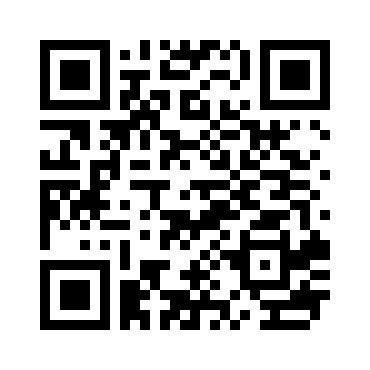

In [ ]:
import qrcode
from IPython.display import Image
def generate_qr_code(link, filename="qrcode.png"):
    qr = qrcode.QRCode(version=1, error_correction=qrcode.constants.ERROR_CORRECT_L, box_size=10, border=4)
    qr.add_data(link)
    qr.make(fit=True)
    img = qr.make_image(fill_color="black", back_color="white")
    img.save(filename)
    return filename
link = input("Enter the link: ")
filename = generate_qr_code(link)
print(f"QR code generated! Saved as {filename}")
Image(filename=filename)

# **3. Wrap-Up Quiz**
###About the storyline (quiz made with gradio, muilple choice questions)

In [ ]:
%%capture
!pip install gradio

In [ ]:
import gradio as gr

story = "https://raw.githubusercontent.com/MK316/Spring2024/main/DLTESOL/project/story04.txt"

questions = [
    {"question": "1. What is the name of Mr. Elias's grandson?", "options": ["John", "Jamie", "Jason"], "answer": "Jamie"},
    {"question": "2. What was the main job of Mr. Elias?", "options": ["Town Council member", "Ship Captain", "Lighthouse keeper"], "answer": "Lighthouse keeper"},
    {"question": "3. Why did the town council want to replace the old lighthouse?", "options": ["It was too expensive to maintain", "It was too bright", "It was damaged by storms"], "answer": "It was too expensive to maintain"},
    {"question": "4. What caused the failure of the new electronic navigation system?", "options": ["Poor installation", "Lack of electricity", "Severe weather conditions"], "answer": "Severe weather conditions"},
    {"question": "5. Who carried the lantern to the top of the lighthouse during the storm??", "options": ["Mr. Elias", "A town council member", "Jamie"], "answer": "Jamie"},
    {"question": "6. What did Jamie learn from the incident with the storm?", "options": ["The lighthouse is unnecessary", "Resilience and tradition are valuable", "Modern technology is always better"], "answer": "Resilience and tradition are valuable"},
    {"question": "7. What did Jamie enjoy most about visiting the lighthouse?", "options": ["The view from the top", "Listening to his grandfather's stories", "Meeting the town council members"], "answer": "Listening to his grandfather's stories"}
]

def quiz(*answers):
    score = 0
    incorrect = []
    for i, question in enumerate(questions):
        if answers[i] == question["answer"]:
            score += 1
        else:
            incorrect.append(f"Question {i+1}: Correct answer is {question['answer']}")
    results = "\n".join(incorrect)
    return score, results

story_display = gr.Markdown(story)
inputs = [gr.Radio(label=q["question"], choices=q["options"]) for q in questions]
outputs = [gr.Textbox(label="Score"), gr.Textbox(label="Incorrect Answers")]

iface = gr.Interface(fn=quiz, inputs=inputs, outputs=outputs, description="Comprehension Quiz for 'The Cave of Whispers'")
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://3611d6cda755512e00.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
%%capture
!pip install qrcode[pil]

Enter the link: https://3611d6cda755512e00.gradio.live
QR code generated! Saved as qrcode.png


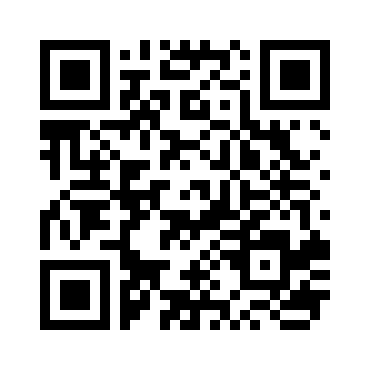

In [ ]:
import qrcode
from IPython.display import Image
def generate_qr_code(link, filename="qrcode.png"):
    qr = qrcode.QRCode(version=1, error_correction=qrcode.constants.ERROR_CORRECT_L, box_size=10, border=4)
    qr.add_data(link)
    qr.make(fit=True)
    img = qr.make_image(fill_color="black", back_color="white")
    img.save(filename)
    return filename
link = input("Enter the link: ")
filename = generate_qr_code(link)
print(f"QR code generated! Saved as {filename}")
Image(filename=filename)

# **4. Homework**
####1. Listen to a native speaker pronounce the story you learned today. (Please use the app below, 'app for listening the whole story')

####2. Read the story and record it with the app below(app for recording your voice). Please pay attention to intonation and pronunciation.

####3. Download your work, and send email to teacher. Your homework is done!

####Teacher's email account: jhxmluv@gmail.com

##**1) App for recording your voice**

In [ ]:
%%capture
!pip install gradio

In [ ]:
import gradio as gr
import numpy as np
import scipy.io.wavfile

def save_audio(audio):
    # The audio parameter is a tuple (sample_rate, data)
    sample_rate, data = audio
    output_file = "recorded_audio.wav"
    scipy.io.wavfile.write(output_file, sample_rate, data)
    return output_file

iface = gr.Interface(
    fn=save_audio,
    inputs=gr.Audio(type="numpy", label="Record your voice"),
    outputs=gr.File(label="Download your recorded audio"),
    title="Voice Recorder",
    description="Record your voice and download the audio file."
)

iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://3ba950bf98f58657c5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


##**2) App for listening the whole story**
* Insert the text and listen to the whole story.

In [ ]:
%%capture
!pip install gradio
!pip install gtts

Text link: https://raw.githubusercontent.com/MK316/Spring2024/main/DLTESOL/project/story04.txt

In [ ]:
import gradio as gr
from gtts import gTTS

def text_to_speech(text):
    # Generate the speech audio
    tts = gTTS(text=text, lang='en')
    tts.save("output.mp3")
    # Return the URL of the saved audio file
    return "output.mp3"

iface = gr.Interface(
    fn=text_to_speech,
    inputs=gr.Textbox(lines=5, label="Enter text to be read aloud"),
    outputs="audio",
    title="Text-to-Speech App",
    description="Enter text and let gTTS read it aloud."
)

iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://6b092c6991ef689236.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
